In [1]:
import pandas as pd
df = pd.read_csv('3dni_pogoda.csv')
df.index = df['Data czas']
df.drop(columns='Data czas', inplace = True)
df.head()

,Energia(t-3),Temp_zewn(t-3),V_wiatru(t-3),Wilg(t-3),Zachm(t-3),Energia(t-2),Temp_zewn(t-2),V_wiatru(t-2),Wilg(t-2),Zachm(t-2),...,Wilg(t-1),Zachm(t-1),Energia(t),Temp_zewn(t),V_wiatru(t),Wilg(t),Zachm(t),Dlug_dnia,Typ_dnia,Pora_roku
Data czas,,,,,,,,,,,,,,,,,,,,,
2016-01-04,4065.480609,-3.691304,3.260870,78.565217,7.304348,4699.010000,-9.341667,4.416667,70.083333,1.416667,...,68.458333,0.041667,5232.324750,-9.908333,3.750000,55.125000,0.000000,7.517,1.0,4.0
2016-01-05,4699.010000,-9.341667,4.416667,70.083333,1.416667,5123.421500,-11.200000,3.708333,68.458333,0.041667,...,55.125000,0.000000,5489.413208,-10.616667,1.916667,61.916667,1.333333,7.550,1.0,4.0
2016-01-06,5123.421500,-11.200000,3.708333,68.458333,0.041667,5232.324750,-9.908333,3.750000,55.125000,0.000000,...,61.916667,1.333333,5661.893417,-11.320833,1.583333,77.583333,0.125000,7.583,5.0,4.0
2016-01-07,5232.324750,-9.908333,3.750000,55.125000,0.000000,5489.413208,-10.616667,1.916667,61.916667,1.333333,...,77.583333,0.125000,5415.852458,-7.220833,2.791667,69.541667,5.916667,7.600,1.0,4.0
2016-01-08,5489.413208,-10.616667,1.916667,61.916667,1.333333,5661.893417,-11.320833,1.583333,77.583333,0.125000,...,69.541667,5.916667,4732.605458,-1.837500,3.916667,90.416667,7.958333,7.650,2.0,4.0


In [2]:
X = df.drop('Energia(t)', axis=1)
y = df['Energia(t)']

In [3]:
X_train, X_test, y_train, y_test = X[:'2017-10-01'], X['2017-10-01':] ,y[:'2017-10-01'] ,y['2017-10-01':]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neural_network import MLPRegressor


mlp = MLPRegressor(hidden_layer_sizes=(33, 33, 33), max_iter=500,
                   shuffle=False,# early_stopping=True,
                  activation='relu', random_state=1,
                  alpha=100000)
mlp.fit(X_train,y_train)


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=100000, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(33, 33, 33), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [75]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
import numpy as np

#alphas = np.logspace(-5, 5, 6)
momentums = range(1, 10, 1)
learning_rates = range(5, 30)

regressors = []
names = []

for lr in learning_rates:
    for m in momentums:
        regressors.append(MLPRegressor(hidden_layer_sizes=(33, 33, 33),max_iter=500,
                                       shuffle=False,
                                       activation='relu',
                                       alpha=100000, random_state=1,
                                       momentum=m/10,learning_rate_init=lr/10000))
        names.append('momentum {}, learning rate {}'.format(m/10, lr/10000))

for name, regressor in zip(names, regressors):
    regressor.fit(X_train,y_train)
    y_p = regressor.predict(X_test)
    print('Alpha {} R2 score: {}'.format(name, explained_variance_score(y_test, y_p)))
    print('Alpha {} mean squered error: {}'.format(name, mean_squared_error(y_test, y_p)))
    print('Alpha {} root mean squered error: {}'.format(name, np.sqrt(mean_squared_error(y_test, y_p))))


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0005 R2 score: 0.7100664991802068
Alpha momentum 0.1, learning rate 0.0005 mean squered error: 135396.98981908173
Alpha momentum 0.1, learning rate 0.0005 root mean squered error: 367.9632995545639


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0005 R2 score: 0.7100664991802068
Alpha momentum 0.2, learning rate 0.0005 mean squered error: 135396.98981908173
Alpha momentum 0.2, learning rate 0.0005 root mean squered error: 367.9632995545639


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0005 R2 score: 0.7100664991802068
Alpha momentum 0.3, learning rate 0.0005 mean squered error: 135396.98981908173
Alpha momentum 0.3, learning rate 0.0005 root mean squered error: 367.9632995545639


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0005 R2 score: 0.7100664991802068
Alpha momentum 0.4, learning rate 0.0005 mean squered error: 135396.98981908173
Alpha momentum 0.4, learning rate 0.0005 root mean squered error: 367.9632995545639


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0005 R2 score: 0.7100664991802068
Alpha momentum 0.5, learning rate 0.0005 mean squered error: 135396.98981908173
Alpha momentum 0.5, learning rate 0.0005 root mean squered error: 367.9632995545639


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0005 R2 score: 0.7100664991802068
Alpha momentum 0.6, learning rate 0.0005 mean squered error: 135396.98981908173
Alpha momentum 0.6, learning rate 0.0005 root mean squered error: 367.9632995545639


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0005 R2 score: 0.7100664991802068
Alpha momentum 0.7, learning rate 0.0005 mean squered error: 135396.98981908173
Alpha momentum 0.7, learning rate 0.0005 root mean squered error: 367.9632995545639


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0005 R2 score: 0.7100664991802068
Alpha momentum 0.8, learning rate 0.0005 mean squered error: 135396.98981908173
Alpha momentum 0.8, learning rate 0.0005 root mean squered error: 367.9632995545639


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0005 R2 score: 0.7100664991802068
Alpha momentum 0.9, learning rate 0.0005 mean squered error: 135396.98981908173
Alpha momentum 0.9, learning rate 0.0005 root mean squered error: 367.9632995545639


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0006 R2 score: 0.7691537796820849
Alpha momentum 0.1, learning rate 0.0006 mean squered error: 99899.66316431703
Alpha momentum 0.1, learning rate 0.0006 root mean squered error: 316.06907973466343


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0006 R2 score: 0.7691537796820849
Alpha momentum 0.2, learning rate 0.0006 mean squered error: 99899.66316431703
Alpha momentum 0.2, learning rate 0.0006 root mean squered error: 316.06907973466343


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0006 R2 score: 0.7691537796820849
Alpha momentum 0.3, learning rate 0.0006 mean squered error: 99899.66316431703
Alpha momentum 0.3, learning rate 0.0006 root mean squered error: 316.06907973466343


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0006 R2 score: 0.7691537796820849
Alpha momentum 0.4, learning rate 0.0006 mean squered error: 99899.66316431703
Alpha momentum 0.4, learning rate 0.0006 root mean squered error: 316.06907973466343


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0006 R2 score: 0.7691537796820849
Alpha momentum 0.5, learning rate 0.0006 mean squered error: 99899.66316431703
Alpha momentum 0.5, learning rate 0.0006 root mean squered error: 316.06907973466343


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0006 R2 score: 0.7691537796820849
Alpha momentum 0.6, learning rate 0.0006 mean squered error: 99899.66316431703
Alpha momentum 0.6, learning rate 0.0006 root mean squered error: 316.06907973466343


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0006 R2 score: 0.7691537796820849
Alpha momentum 0.7, learning rate 0.0006 mean squered error: 99899.66316431703
Alpha momentum 0.7, learning rate 0.0006 root mean squered error: 316.06907973466343


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0006 R2 score: 0.7691537796820849
Alpha momentum 0.8, learning rate 0.0006 mean squered error: 99899.66316431703
Alpha momentum 0.8, learning rate 0.0006 root mean squered error: 316.06907973466343


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0006 R2 score: 0.7691537796820849
Alpha momentum 0.9, learning rate 0.0006 mean squered error: 99899.66316431703
Alpha momentum 0.9, learning rate 0.0006 root mean squered error: 316.06907973466343


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0007 R2 score: 0.8173717868775228
Alpha momentum 0.1, learning rate 0.0007 mean squered error: 75454.55428426669
Alpha momentum 0.1, learning rate 0.0007 root mean squered error: 274.6899238855817


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0007 R2 score: 0.8173717868775228
Alpha momentum 0.2, learning rate 0.0007 mean squered error: 75454.55428426669
Alpha momentum 0.2, learning rate 0.0007 root mean squered error: 274.6899238855817


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0007 R2 score: 0.8173717868775228
Alpha momentum 0.3, learning rate 0.0007 mean squered error: 75454.55428426669
Alpha momentum 0.3, learning rate 0.0007 root mean squered error: 274.6899238855817


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0007 R2 score: 0.8173717868775228
Alpha momentum 0.4, learning rate 0.0007 mean squered error: 75454.55428426669
Alpha momentum 0.4, learning rate 0.0007 root mean squered error: 274.6899238855817


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0007 R2 score: 0.8173717868775228
Alpha momentum 0.5, learning rate 0.0007 mean squered error: 75454.55428426669
Alpha momentum 0.5, learning rate 0.0007 root mean squered error: 274.6899238855817


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0007 R2 score: 0.8173717868775228
Alpha momentum 0.6, learning rate 0.0007 mean squered error: 75454.55428426669
Alpha momentum 0.6, learning rate 0.0007 root mean squered error: 274.6899238855817


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0007 R2 score: 0.8173717868775228
Alpha momentum 0.7, learning rate 0.0007 mean squered error: 75454.55428426669
Alpha momentum 0.7, learning rate 0.0007 root mean squered error: 274.6899238855817


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0007 R2 score: 0.8173717868775228
Alpha momentum 0.8, learning rate 0.0007 mean squered error: 75454.55428426669
Alpha momentum 0.8, learning rate 0.0007 root mean squered error: 274.6899238855817


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0007 R2 score: 0.8173717868775228
Alpha momentum 0.9, learning rate 0.0007 mean squered error: 75454.55428426669
Alpha momentum 0.9, learning rate 0.0007 root mean squered error: 274.6899238855817


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0008 R2 score: 0.8575050328186995
Alpha momentum 0.1, learning rate 0.0008 mean squered error: 58191.35319521731
Alpha momentum 0.1, learning rate 0.0008 root mean squered error: 241.22883989112353


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0008 R2 score: 0.8575050328186995
Alpha momentum 0.2, learning rate 0.0008 mean squered error: 58191.35319521731
Alpha momentum 0.2, learning rate 0.0008 root mean squered error: 241.22883989112353


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0008 R2 score: 0.8575050328186995
Alpha momentum 0.3, learning rate 0.0008 mean squered error: 58191.35319521731
Alpha momentum 0.3, learning rate 0.0008 root mean squered error: 241.22883989112353


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0008 R2 score: 0.8575050328186995
Alpha momentum 0.4, learning rate 0.0008 mean squered error: 58191.35319521731
Alpha momentum 0.4, learning rate 0.0008 root mean squered error: 241.22883989112353


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0008 R2 score: 0.8575050328186995
Alpha momentum 0.5, learning rate 0.0008 mean squered error: 58191.35319521731
Alpha momentum 0.5, learning rate 0.0008 root mean squered error: 241.22883989112353


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0008 R2 score: 0.8575050328186995
Alpha momentum 0.6, learning rate 0.0008 mean squered error: 58191.35319521731
Alpha momentum 0.6, learning rate 0.0008 root mean squered error: 241.22883989112353


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0008 R2 score: 0.8575050328186995
Alpha momentum 0.7, learning rate 0.0008 mean squered error: 58191.35319521731
Alpha momentum 0.7, learning rate 0.0008 root mean squered error: 241.22883989112353


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0008 R2 score: 0.8575050328186995
Alpha momentum 0.8, learning rate 0.0008 mean squered error: 58191.35319521731
Alpha momentum 0.8, learning rate 0.0008 root mean squered error: 241.22883989112353


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0008 R2 score: 0.8575050328186995
Alpha momentum 0.9, learning rate 0.0008 mean squered error: 58191.35319521731
Alpha momentum 0.9, learning rate 0.0008 root mean squered error: 241.22883989112353


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0009 R2 score: 0.8921598398763363
Alpha momentum 0.1, learning rate 0.0009 mean squered error: 44716.597542231226
Alpha momentum 0.1, learning rate 0.0009 root mean squered error: 211.4629933161621


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0009 R2 score: 0.8921598398763363
Alpha momentum 0.2, learning rate 0.0009 mean squered error: 44716.597542231226
Alpha momentum 0.2, learning rate 0.0009 root mean squered error: 211.4629933161621


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0009 R2 score: 0.8921598398763363
Alpha momentum 0.3, learning rate 0.0009 mean squered error: 44716.597542231226
Alpha momentum 0.3, learning rate 0.0009 root mean squered error: 211.4629933161621


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0009 R2 score: 0.8921598398763363
Alpha momentum 0.4, learning rate 0.0009 mean squered error: 44716.597542231226
Alpha momentum 0.4, learning rate 0.0009 root mean squered error: 211.4629933161621


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0009 R2 score: 0.8921598398763363
Alpha momentum 0.5, learning rate 0.0009 mean squered error: 44716.597542231226
Alpha momentum 0.5, learning rate 0.0009 root mean squered error: 211.4629933161621


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0009 R2 score: 0.8921598398763363
Alpha momentum 0.6, learning rate 0.0009 mean squered error: 44716.597542231226
Alpha momentum 0.6, learning rate 0.0009 root mean squered error: 211.4629933161621


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0009 R2 score: 0.8921598398763363
Alpha momentum 0.7, learning rate 0.0009 mean squered error: 44716.597542231226
Alpha momentum 0.7, learning rate 0.0009 root mean squered error: 211.4629933161621


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0009 R2 score: 0.8921598398763363
Alpha momentum 0.8, learning rate 0.0009 mean squered error: 44716.597542231226
Alpha momentum 0.8, learning rate 0.0009 root mean squered error: 211.4629933161621


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0009 R2 score: 0.8921598398763363
Alpha momentum 0.9, learning rate 0.0009 mean squered error: 44716.597542231226
Alpha momentum 0.9, learning rate 0.0009 root mean squered error: 211.4629933161621


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.001 R2 score: 0.9155466795364061
Alpha momentum 0.1, learning rate 0.001 mean squered error: 35854.467331361266
Alpha momentum 0.1, learning rate 0.001 root mean squered error: 189.35275897478036


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.001 R2 score: 0.9155466795364061
Alpha momentum 0.2, learning rate 0.001 mean squered error: 35854.467331361266
Alpha momentum 0.2, learning rate 0.001 root mean squered error: 189.35275897478036


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.001 R2 score: 0.9155466795364061
Alpha momentum 0.3, learning rate 0.001 mean squered error: 35854.467331361266
Alpha momentum 0.3, learning rate 0.001 root mean squered error: 189.35275897478036


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.001 R2 score: 0.9155466795364061
Alpha momentum 0.4, learning rate 0.001 mean squered error: 35854.467331361266
Alpha momentum 0.4, learning rate 0.001 root mean squered error: 189.35275897478036


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.001 R2 score: 0.9155466795364061
Alpha momentum 0.5, learning rate 0.001 mean squered error: 35854.467331361266
Alpha momentum 0.5, learning rate 0.001 root mean squered error: 189.35275897478036


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.001 R2 score: 0.9155466795364061
Alpha momentum 0.6, learning rate 0.001 mean squered error: 35854.467331361266
Alpha momentum 0.6, learning rate 0.001 root mean squered error: 189.35275897478036


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.001 R2 score: 0.9155466795364061
Alpha momentum 0.7, learning rate 0.001 mean squered error: 35854.467331361266
Alpha momentum 0.7, learning rate 0.001 root mean squered error: 189.35275897478036


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.001 R2 score: 0.9155466795364061
Alpha momentum 0.8, learning rate 0.001 mean squered error: 35854.467331361266
Alpha momentum 0.8, learning rate 0.001 root mean squered error: 189.35275897478036


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.001 R2 score: 0.9155466795364061
Alpha momentum 0.9, learning rate 0.001 mean squered error: 35854.467331361266
Alpha momentum 0.9, learning rate 0.001 root mean squered error: 189.35275897478036


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0011 R2 score: 0.9303753063034126
Alpha momentum 0.1, learning rate 0.0011 mean squered error: 30268.902967081947
Alpha momentum 0.1, learning rate 0.0011 root mean squered error: 173.97960503197478


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0011 R2 score: 0.9303753063034126
Alpha momentum 0.2, learning rate 0.0011 mean squered error: 30268.902967081947
Alpha momentum 0.2, learning rate 0.0011 root mean squered error: 173.97960503197478


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0011 R2 score: 0.9303753063034126
Alpha momentum 0.3, learning rate 0.0011 mean squered error: 30268.902967081947
Alpha momentum 0.3, learning rate 0.0011 root mean squered error: 173.97960503197478


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0011 R2 score: 0.9303753063034126
Alpha momentum 0.4, learning rate 0.0011 mean squered error: 30268.902967081947
Alpha momentum 0.4, learning rate 0.0011 root mean squered error: 173.97960503197478


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0011 R2 score: 0.9303753063034126
Alpha momentum 0.5, learning rate 0.0011 mean squered error: 30268.902967081947
Alpha momentum 0.5, learning rate 0.0011 root mean squered error: 173.97960503197478


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0011 R2 score: 0.9303753063034126
Alpha momentum 0.6, learning rate 0.0011 mean squered error: 30268.902967081947
Alpha momentum 0.6, learning rate 0.0011 root mean squered error: 173.97960503197478


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0011 R2 score: 0.9303753063034126
Alpha momentum 0.7, learning rate 0.0011 mean squered error: 30268.902967081947
Alpha momentum 0.7, learning rate 0.0011 root mean squered error: 173.97960503197478


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0011 R2 score: 0.9303753063034126
Alpha momentum 0.8, learning rate 0.0011 mean squered error: 30268.902967081947
Alpha momentum 0.8, learning rate 0.0011 root mean squered error: 173.97960503197478


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0011 R2 score: 0.9303753063034126
Alpha momentum 0.9, learning rate 0.0011 mean squered error: 30268.902967081947
Alpha momentum 0.9, learning rate 0.0011 root mean squered error: 173.97960503197478


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0012 R2 score: 0.9408434338751883
Alpha momentum 0.1, learning rate 0.0012 mean squered error: 26438.63727239929
Alpha momentum 0.1, learning rate 0.0012 root mean squered error: 162.59962260841596


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0012 R2 score: 0.9408434338751883
Alpha momentum 0.2, learning rate 0.0012 mean squered error: 26438.63727239929
Alpha momentum 0.2, learning rate 0.0012 root mean squered error: 162.59962260841596


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0012 R2 score: 0.9408434338751883
Alpha momentum 0.3, learning rate 0.0012 mean squered error: 26438.63727239929
Alpha momentum 0.3, learning rate 0.0012 root mean squered error: 162.59962260841596


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0012 R2 score: 0.9408434338751883
Alpha momentum 0.4, learning rate 0.0012 mean squered error: 26438.63727239929
Alpha momentum 0.4, learning rate 0.0012 root mean squered error: 162.59962260841596


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0012 R2 score: 0.9408434338751883
Alpha momentum 0.5, learning rate 0.0012 mean squered error: 26438.63727239929
Alpha momentum 0.5, learning rate 0.0012 root mean squered error: 162.59962260841596


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0012 R2 score: 0.9408434338751883
Alpha momentum 0.6, learning rate 0.0012 mean squered error: 26438.63727239929
Alpha momentum 0.6, learning rate 0.0012 root mean squered error: 162.59962260841596


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0012 R2 score: 0.9408434338751883
Alpha momentum 0.7, learning rate 0.0012 mean squered error: 26438.63727239929
Alpha momentum 0.7, learning rate 0.0012 root mean squered error: 162.59962260841596


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0012 R2 score: 0.9408434338751883
Alpha momentum 0.8, learning rate 0.0012 mean squered error: 26438.63727239929
Alpha momentum 0.8, learning rate 0.0012 root mean squered error: 162.59962260841596


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0012 R2 score: 0.9408434338751883
Alpha momentum 0.9, learning rate 0.0012 mean squered error: 26438.63727239929
Alpha momentum 0.9, learning rate 0.0012 root mean squered error: 162.59962260841596


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0013 R2 score: 0.9468839436536798
Alpha momentum 0.1, learning rate 0.0013 mean squered error: 24250.232702957794
Alpha momentum 0.1, learning rate 0.0013 root mean squered error: 155.7248621863503


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0013 R2 score: 0.9468839436536798
Alpha momentum 0.2, learning rate 0.0013 mean squered error: 24250.232702957794
Alpha momentum 0.2, learning rate 0.0013 root mean squered error: 155.7248621863503


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0013 R2 score: 0.9468839436536798
Alpha momentum 0.3, learning rate 0.0013 mean squered error: 24250.232702957794
Alpha momentum 0.3, learning rate 0.0013 root mean squered error: 155.7248621863503


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0013 R2 score: 0.9468839436536798
Alpha momentum 0.4, learning rate 0.0013 mean squered error: 24250.232702957794
Alpha momentum 0.4, learning rate 0.0013 root mean squered error: 155.7248621863503


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0013 R2 score: 0.9468839436536798
Alpha momentum 0.5, learning rate 0.0013 mean squered error: 24250.232702957794
Alpha momentum 0.5, learning rate 0.0013 root mean squered error: 155.7248621863503


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0013 R2 score: 0.9468839436536798
Alpha momentum 0.6, learning rate 0.0013 mean squered error: 24250.232702957794
Alpha momentum 0.6, learning rate 0.0013 root mean squered error: 155.7248621863503


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0013 R2 score: 0.9468839436536798
Alpha momentum 0.7, learning rate 0.0013 mean squered error: 24250.232702957794
Alpha momentum 0.7, learning rate 0.0013 root mean squered error: 155.7248621863503


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0013 R2 score: 0.9468839436536798
Alpha momentum 0.8, learning rate 0.0013 mean squered error: 24250.232702957794
Alpha momentum 0.8, learning rate 0.0013 root mean squered error: 155.7248621863503


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0013 R2 score: 0.9468839436536798
Alpha momentum 0.9, learning rate 0.0013 mean squered error: 24250.232702957794
Alpha momentum 0.9, learning rate 0.0013 root mean squered error: 155.7248621863503


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0014 R2 score: 0.9507126650880882
Alpha momentum 0.1, learning rate 0.0014 mean squered error: 22837.828196381477
Alpha momentum 0.1, learning rate 0.0014 root mean squered error: 151.12189846736797


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0014 R2 score: 0.9507126650880882
Alpha momentum 0.2, learning rate 0.0014 mean squered error: 22837.828196381477
Alpha momentum 0.2, learning rate 0.0014 root mean squered error: 151.12189846736797


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0014 R2 score: 0.9507126650880882
Alpha momentum 0.3, learning rate 0.0014 mean squered error: 22837.828196381477
Alpha momentum 0.3, learning rate 0.0014 root mean squered error: 151.12189846736797


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0014 R2 score: 0.9507126650880882
Alpha momentum 0.4, learning rate 0.0014 mean squered error: 22837.828196381477
Alpha momentum 0.4, learning rate 0.0014 root mean squered error: 151.12189846736797


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0014 R2 score: 0.9507126650880882
Alpha momentum 0.5, learning rate 0.0014 mean squered error: 22837.828196381477
Alpha momentum 0.5, learning rate 0.0014 root mean squered error: 151.12189846736797


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0014 R2 score: 0.9507126650880882
Alpha momentum 0.6, learning rate 0.0014 mean squered error: 22837.828196381477
Alpha momentum 0.6, learning rate 0.0014 root mean squered error: 151.12189846736797


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0014 R2 score: 0.9507126650880882
Alpha momentum 0.7, learning rate 0.0014 mean squered error: 22837.828196381477
Alpha momentum 0.7, learning rate 0.0014 root mean squered error: 151.12189846736797


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0014 R2 score: 0.9507126650880882
Alpha momentum 0.8, learning rate 0.0014 mean squered error: 22837.828196381477
Alpha momentum 0.8, learning rate 0.0014 root mean squered error: 151.12189846736797


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0014 R2 score: 0.9507126650880882
Alpha momentum 0.9, learning rate 0.0014 mean squered error: 22837.828196381477
Alpha momentum 0.9, learning rate 0.0014 root mean squered error: 151.12189846736797


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0015 R2 score: 0.953557443286897
Alpha momentum 0.1, learning rate 0.0015 mean squered error: 21838.78651592133
Alpha momentum 0.1, learning rate 0.0015 root mean squered error: 147.77951994752632


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0015 R2 score: 0.953557443286897
Alpha momentum 0.2, learning rate 0.0015 mean squered error: 21838.78651592133
Alpha momentum 0.2, learning rate 0.0015 root mean squered error: 147.77951994752632


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0015 R2 score: 0.953557443286897
Alpha momentum 0.3, learning rate 0.0015 mean squered error: 21838.78651592133
Alpha momentum 0.3, learning rate 0.0015 root mean squered error: 147.77951994752632


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0015 R2 score: 0.953557443286897
Alpha momentum 0.4, learning rate 0.0015 mean squered error: 21838.78651592133
Alpha momentum 0.4, learning rate 0.0015 root mean squered error: 147.77951994752632


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0015 R2 score: 0.953557443286897
Alpha momentum 0.5, learning rate 0.0015 mean squered error: 21838.78651592133
Alpha momentum 0.5, learning rate 0.0015 root mean squered error: 147.77951994752632


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0015 R2 score: 0.953557443286897
Alpha momentum 0.6, learning rate 0.0015 mean squered error: 21838.78651592133
Alpha momentum 0.6, learning rate 0.0015 root mean squered error: 147.77951994752632


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0015 R2 score: 0.953557443286897
Alpha momentum 0.7, learning rate 0.0015 mean squered error: 21838.78651592133
Alpha momentum 0.7, learning rate 0.0015 root mean squered error: 147.77951994752632


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0015 R2 score: 0.953557443286897
Alpha momentum 0.8, learning rate 0.0015 mean squered error: 21838.78651592133
Alpha momentum 0.8, learning rate 0.0015 root mean squered error: 147.77951994752632


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0015 R2 score: 0.953557443286897
Alpha momentum 0.9, learning rate 0.0015 mean squered error: 21838.78651592133
Alpha momentum 0.9, learning rate 0.0015 root mean squered error: 147.77951994752632


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0016 R2 score: 0.9556273708587342
Alpha momentum 0.1, learning rate 0.0016 mean squered error: 21053.527801607797
Alpha momentum 0.1, learning rate 0.0016 root mean squered error: 145.09833838334538


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0016 R2 score: 0.9556273708587342
Alpha momentum 0.2, learning rate 0.0016 mean squered error: 21053.527801607797
Alpha momentum 0.2, learning rate 0.0016 root mean squered error: 145.09833838334538


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0016 R2 score: 0.9556273708587342
Alpha momentum 0.3, learning rate 0.0016 mean squered error: 21053.527801607797
Alpha momentum 0.3, learning rate 0.0016 root mean squered error: 145.09833838334538


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0016 R2 score: 0.9556273708587342
Alpha momentum 0.4, learning rate 0.0016 mean squered error: 21053.527801607797
Alpha momentum 0.4, learning rate 0.0016 root mean squered error: 145.09833838334538


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0016 R2 score: 0.9556273708587342
Alpha momentum 0.5, learning rate 0.0016 mean squered error: 21053.527801607797
Alpha momentum 0.5, learning rate 0.0016 root mean squered error: 145.09833838334538


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0016 R2 score: 0.9556273708587342
Alpha momentum 0.6, learning rate 0.0016 mean squered error: 21053.527801607797
Alpha momentum 0.6, learning rate 0.0016 root mean squered error: 145.09833838334538


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0016 R2 score: 0.9556273708587342
Alpha momentum 0.7, learning rate 0.0016 mean squered error: 21053.527801607797
Alpha momentum 0.7, learning rate 0.0016 root mean squered error: 145.09833838334538


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0016 R2 score: 0.9556273708587342
Alpha momentum 0.8, learning rate 0.0016 mean squered error: 21053.527801607797
Alpha momentum 0.8, learning rate 0.0016 root mean squered error: 145.09833838334538


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0016 R2 score: 0.9556273708587342
Alpha momentum 0.9, learning rate 0.0016 mean squered error: 21053.527801607797
Alpha momentum 0.9, learning rate 0.0016 root mean squered error: 145.09833838334538


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0017 R2 score: 0.9574589945046078
Alpha momentum 0.1, learning rate 0.0017 mean squered error: 20231.61559133781
Alpha momentum 0.1, learning rate 0.0017 root mean squered error: 142.23788381207663


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0017 R2 score: 0.9574589945046078
Alpha momentum 0.2, learning rate 0.0017 mean squered error: 20231.61559133781
Alpha momentum 0.2, learning rate 0.0017 root mean squered error: 142.23788381207663


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0017 R2 score: 0.9574589945046078
Alpha momentum 0.3, learning rate 0.0017 mean squered error: 20231.61559133781
Alpha momentum 0.3, learning rate 0.0017 root mean squered error: 142.23788381207663


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0017 R2 score: 0.9574589945046078
Alpha momentum 0.4, learning rate 0.0017 mean squered error: 20231.61559133781
Alpha momentum 0.4, learning rate 0.0017 root mean squered error: 142.23788381207663


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0017 R2 score: 0.9574589945046078
Alpha momentum 0.5, learning rate 0.0017 mean squered error: 20231.61559133781
Alpha momentum 0.5, learning rate 0.0017 root mean squered error: 142.23788381207663


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0017 R2 score: 0.9574589945046078
Alpha momentum 0.6, learning rate 0.0017 mean squered error: 20231.61559133781
Alpha momentum 0.6, learning rate 0.0017 root mean squered error: 142.23788381207663


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0017 R2 score: 0.9574589945046078
Alpha momentum 0.7, learning rate 0.0017 mean squered error: 20231.61559133781
Alpha momentum 0.7, learning rate 0.0017 root mean squered error: 142.23788381207663


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0017 R2 score: 0.9574589945046078
Alpha momentum 0.8, learning rate 0.0017 mean squered error: 20231.61559133781
Alpha momentum 0.8, learning rate 0.0017 root mean squered error: 142.23788381207663


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0017 R2 score: 0.9574589945046078
Alpha momentum 0.9, learning rate 0.0017 mean squered error: 20231.61559133781
Alpha momentum 0.9, learning rate 0.0017 root mean squered error: 142.23788381207663


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0018 R2 score: 0.9591889354500371
Alpha momentum 0.1, learning rate 0.0018 mean squered error: 19257.254725033486
Alpha momentum 0.1, learning rate 0.0018 root mean squered error: 138.77051100660213


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0018 R2 score: 0.9591889354500371
Alpha momentum 0.2, learning rate 0.0018 mean squered error: 19257.254725033486
Alpha momentum 0.2, learning rate 0.0018 root mean squered error: 138.77051100660213


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0018 R2 score: 0.9591889354500371
Alpha momentum 0.3, learning rate 0.0018 mean squered error: 19257.254725033486
Alpha momentum 0.3, learning rate 0.0018 root mean squered error: 138.77051100660213


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0018 R2 score: 0.9591889354500371
Alpha momentum 0.4, learning rate 0.0018 mean squered error: 19257.254725033486
Alpha momentum 0.4, learning rate 0.0018 root mean squered error: 138.77051100660213


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0018 R2 score: 0.9591889354500371
Alpha momentum 0.5, learning rate 0.0018 mean squered error: 19257.254725033486
Alpha momentum 0.5, learning rate 0.0018 root mean squered error: 138.77051100660213


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0018 R2 score: 0.9591889354500371
Alpha momentum 0.6, learning rate 0.0018 mean squered error: 19257.254725033486
Alpha momentum 0.6, learning rate 0.0018 root mean squered error: 138.77051100660213


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0018 R2 score: 0.9591889354500371
Alpha momentum 0.7, learning rate 0.0018 mean squered error: 19257.254725033486
Alpha momentum 0.7, learning rate 0.0018 root mean squered error: 138.77051100660213


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0018 R2 score: 0.9591889354500371
Alpha momentum 0.8, learning rate 0.0018 mean squered error: 19257.254725033486
Alpha momentum 0.8, learning rate 0.0018 root mean squered error: 138.77051100660213


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0018 R2 score: 0.9591889354500371
Alpha momentum 0.9, learning rate 0.0018 mean squered error: 19257.254725033486
Alpha momentum 0.9, learning rate 0.0018 root mean squered error: 138.77051100660213


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0019 R2 score: 0.9607332730308809
Alpha momentum 0.1, learning rate 0.0019 mean squered error: 18301.17763716203
Alpha momentum 0.1, learning rate 0.0019 root mean squered error: 135.28184518686174


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0019 R2 score: 0.9607332730308809
Alpha momentum 0.2, learning rate 0.0019 mean squered error: 18301.17763716203
Alpha momentum 0.2, learning rate 0.0019 root mean squered error: 135.28184518686174


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0019 R2 score: 0.9607332730308809
Alpha momentum 0.3, learning rate 0.0019 mean squered error: 18301.17763716203
Alpha momentum 0.3, learning rate 0.0019 root mean squered error: 135.28184518686174


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0019 R2 score: 0.9607332730308809
Alpha momentum 0.4, learning rate 0.0019 mean squered error: 18301.17763716203
Alpha momentum 0.4, learning rate 0.0019 root mean squered error: 135.28184518686174


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0019 R2 score: 0.9607332730308809
Alpha momentum 0.5, learning rate 0.0019 mean squered error: 18301.17763716203
Alpha momentum 0.5, learning rate 0.0019 root mean squered error: 135.28184518686174


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0019 R2 score: 0.9607332730308809
Alpha momentum 0.6, learning rate 0.0019 mean squered error: 18301.17763716203
Alpha momentum 0.6, learning rate 0.0019 root mean squered error: 135.28184518686174


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0019 R2 score: 0.9607332730308809
Alpha momentum 0.7, learning rate 0.0019 mean squered error: 18301.17763716203
Alpha momentum 0.7, learning rate 0.0019 root mean squered error: 135.28184518686174


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0019 R2 score: 0.9607332730308809
Alpha momentum 0.8, learning rate 0.0019 mean squered error: 18301.17763716203
Alpha momentum 0.8, learning rate 0.0019 root mean squered error: 135.28184518686174


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0019 R2 score: 0.9607332730308809
Alpha momentum 0.9, learning rate 0.0019 mean squered error: 18301.17763716203
Alpha momentum 0.9, learning rate 0.0019 root mean squered error: 135.28184518686174


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.002 R2 score: 0.9620083667045275
Alpha momentum 0.1, learning rate 0.002 mean squered error: 17559.07436884555
Alpha momentum 0.1, learning rate 0.002 root mean squered error: 132.51065756702573


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.002 R2 score: 0.9620083667045275
Alpha momentum 0.2, learning rate 0.002 mean squered error: 17559.07436884555
Alpha momentum 0.2, learning rate 0.002 root mean squered error: 132.51065756702573


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.002 R2 score: 0.9620083667045275
Alpha momentum 0.3, learning rate 0.002 mean squered error: 17559.07436884555
Alpha momentum 0.3, learning rate 0.002 root mean squered error: 132.51065756702573


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.002 R2 score: 0.9620083667045275
Alpha momentum 0.4, learning rate 0.002 mean squered error: 17559.07436884555
Alpha momentum 0.4, learning rate 0.002 root mean squered error: 132.51065756702573


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.002 R2 score: 0.9620083667045275
Alpha momentum 0.5, learning rate 0.002 mean squered error: 17559.07436884555
Alpha momentum 0.5, learning rate 0.002 root mean squered error: 132.51065756702573


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.002 R2 score: 0.9620083667045275
Alpha momentum 0.6, learning rate 0.002 mean squered error: 17559.07436884555
Alpha momentum 0.6, learning rate 0.002 root mean squered error: 132.51065756702573


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.002 R2 score: 0.9620083667045275
Alpha momentum 0.7, learning rate 0.002 mean squered error: 17559.07436884555
Alpha momentum 0.7, learning rate 0.002 root mean squered error: 132.51065756702573


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.002 R2 score: 0.9620083667045275
Alpha momentum 0.8, learning rate 0.002 mean squered error: 17559.07436884555
Alpha momentum 0.8, learning rate 0.002 root mean squered error: 132.51065756702573


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.002 R2 score: 0.9620083667045275
Alpha momentum 0.9, learning rate 0.002 mean squered error: 17559.07436884555
Alpha momentum 0.9, learning rate 0.002 root mean squered error: 132.51065756702573


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0021 R2 score: 0.9634207200148259
Alpha momentum 0.1, learning rate 0.0021 mean squered error: 16685.480928369343
Alpha momentum 0.1, learning rate 0.0021 root mean squered error: 129.17229164325198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0021 R2 score: 0.9634207200148259
Alpha momentum 0.2, learning rate 0.0021 mean squered error: 16685.480928369343
Alpha momentum 0.2, learning rate 0.0021 root mean squered error: 129.17229164325198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0021 R2 score: 0.9634207200148259
Alpha momentum 0.3, learning rate 0.0021 mean squered error: 16685.480928369343
Alpha momentum 0.3, learning rate 0.0021 root mean squered error: 129.17229164325198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0021 R2 score: 0.9634207200148259
Alpha momentum 0.4, learning rate 0.0021 mean squered error: 16685.480928369343
Alpha momentum 0.4, learning rate 0.0021 root mean squered error: 129.17229164325198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0021 R2 score: 0.9634207200148259
Alpha momentum 0.5, learning rate 0.0021 mean squered error: 16685.480928369343
Alpha momentum 0.5, learning rate 0.0021 root mean squered error: 129.17229164325198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0021 R2 score: 0.9634207200148259
Alpha momentum 0.6, learning rate 0.0021 mean squered error: 16685.480928369343
Alpha momentum 0.6, learning rate 0.0021 root mean squered error: 129.17229164325198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0021 R2 score: 0.9634207200148259
Alpha momentum 0.7, learning rate 0.0021 mean squered error: 16685.480928369343
Alpha momentum 0.7, learning rate 0.0021 root mean squered error: 129.17229164325198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0021 R2 score: 0.9634207200148259
Alpha momentum 0.8, learning rate 0.0021 mean squered error: 16685.480928369343
Alpha momentum 0.8, learning rate 0.0021 root mean squered error: 129.17229164325198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0021 R2 score: 0.9634207200148259
Alpha momentum 0.9, learning rate 0.0021 mean squered error: 16685.480928369343
Alpha momentum 0.9, learning rate 0.0021 root mean squered error: 129.17229164325198


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0022 R2 score: 0.9643822703720307
Alpha momentum 0.1, learning rate 0.0022 mean squered error: 16057.33977355046
Alpha momentum 0.1, learning rate 0.0022 root mean squered error: 126.71755905773462


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0022 R2 score: 0.9643822703720307
Alpha momentum 0.2, learning rate 0.0022 mean squered error: 16057.33977355046
Alpha momentum 0.2, learning rate 0.0022 root mean squered error: 126.71755905773462


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0022 R2 score: 0.9643822703720307
Alpha momentum 0.3, learning rate 0.0022 mean squered error: 16057.33977355046
Alpha momentum 0.3, learning rate 0.0022 root mean squered error: 126.71755905773462


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0022 R2 score: 0.9643822703720307
Alpha momentum 0.4, learning rate 0.0022 mean squered error: 16057.33977355046
Alpha momentum 0.4, learning rate 0.0022 root mean squered error: 126.71755905773462


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0022 R2 score: 0.9643822703720307
Alpha momentum 0.5, learning rate 0.0022 mean squered error: 16057.33977355046
Alpha momentum 0.5, learning rate 0.0022 root mean squered error: 126.71755905773462


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0022 R2 score: 0.9643822703720307
Alpha momentum 0.6, learning rate 0.0022 mean squered error: 16057.33977355046
Alpha momentum 0.6, learning rate 0.0022 root mean squered error: 126.71755905773462


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0022 R2 score: 0.9643822703720307
Alpha momentum 0.7, learning rate 0.0022 mean squered error: 16057.33977355046
Alpha momentum 0.7, learning rate 0.0022 root mean squered error: 126.71755905773462


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0022 R2 score: 0.9643822703720307
Alpha momentum 0.8, learning rate 0.0022 mean squered error: 16057.33977355046
Alpha momentum 0.8, learning rate 0.0022 root mean squered error: 126.71755905773462


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0022 R2 score: 0.9643822703720307
Alpha momentum 0.9, learning rate 0.0022 mean squered error: 16057.33977355046
Alpha momentum 0.9, learning rate 0.0022 root mean squered error: 126.71755905773462


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.1, learning rate 0.0023 R2 score: 0.9649921230975802
Alpha momentum 0.1, learning rate 0.0023 mean squered error: 15657.268503597179
Alpha momentum 0.1, learning rate 0.0023 root mean squered error: 125.12900744270762


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.2, learning rate 0.0023 R2 score: 0.9649921230975802
Alpha momentum 0.2, learning rate 0.0023 mean squered error: 15657.268503597179
Alpha momentum 0.2, learning rate 0.0023 root mean squered error: 125.12900744270762


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.3, learning rate 0.0023 R2 score: 0.9649921230975802
Alpha momentum 0.3, learning rate 0.0023 mean squered error: 15657.268503597179
Alpha momentum 0.3, learning rate 0.0023 root mean squered error: 125.12900744270762


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.4, learning rate 0.0023 R2 score: 0.9649921230975802
Alpha momentum 0.4, learning rate 0.0023 mean squered error: 15657.268503597179
Alpha momentum 0.4, learning rate 0.0023 root mean squered error: 125.12900744270762


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.5, learning rate 0.0023 R2 score: 0.9649921230975802
Alpha momentum 0.5, learning rate 0.0023 mean squered error: 15657.268503597179
Alpha momentum 0.5, learning rate 0.0023 root mean squered error: 125.12900744270762


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.6, learning rate 0.0023 R2 score: 0.9649921230975802
Alpha momentum 0.6, learning rate 0.0023 mean squered error: 15657.268503597179
Alpha momentum 0.6, learning rate 0.0023 root mean squered error: 125.12900744270762


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.7, learning rate 0.0023 R2 score: 0.9649921230975802
Alpha momentum 0.7, learning rate 0.0023 mean squered error: 15657.268503597179
Alpha momentum 0.7, learning rate 0.0023 root mean squered error: 125.12900744270762


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.8, learning rate 0.0023 R2 score: 0.9649921230975802
Alpha momentum 0.8, learning rate 0.0023 mean squered error: 15657.268503597179
Alpha momentum 0.8, learning rate 0.0023 root mean squered error: 125.12900744270762


/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha momentum 0.9, learning rate 0.0023 R2 score: 0.9649921230975802
Alpha momentum 0.9, learning rate 0.0023 mean squered error: 15657.268503597179
Alpha momentum 0.9, learning rate 0.0023 root mean squered error: 125.12900744270762
Alpha momentum 0.1, learning rate 0.0024 R2 score: 0.9541351587062278
Alpha momentum 0.1, learning rate 0.0024 mean squered error: 26503.988622894176
Alpha momentum 0.1, learning rate 0.0024 root mean squered error: 162.8004564578803
Alpha momentum 0.2, learning rate 0.0024 R2 score: 0.9541351587062278
Alpha momentum 0.2, learning rate 0.0024 mean squered error: 26503.988622894176
Alpha momentum 0.2, learning rate 0.0024 root mean squered error: 162.8004564578803
Alpha momentum 0.3, learning rate 0.0024 R2 score: 0.9541351587062278
Alpha momentum 0.3, learning rate 0.0024 mean squered error: 26503.988622894176
Alpha momentum 0.3, learning rate 0.0024 root mean squered error: 162.8004564578803
Alpha momentum 0.4, learning rate 0.0024 R2 score: 0.9541351587

Alpha momentum 0.8, learning rate 0.0027 R2 score: 0.9606861012775297
Alpha momentum 0.8, learning rate 0.0027 mean squered error: 19569.527123184413
Alpha momentum 0.8, learning rate 0.0027 root mean squered error: 139.89112596295882
Alpha momentum 0.9, learning rate 0.0027 R2 score: 0.9606861012775297
Alpha momentum 0.9, learning rate 0.0027 mean squered error: 19569.527123184413
Alpha momentum 0.9, learning rate 0.0027 root mean squered error: 139.89112596295882
Alpha momentum 0.1, learning rate 0.0028 R2 score: 0.9619926099285965
Alpha momentum 0.1, learning rate 0.0028 mean squered error: 18154.242944450776
Alpha momentum 0.1, learning rate 0.0028 root mean squered error: 134.73768197668676
Alpha momentum 0.2, learning rate 0.0028 R2 score: 0.9619926099285965
Alpha momentum 0.2, learning rate 0.0028 mean squered error: 18154.242944450776
Alpha momentum 0.2, learning rate 0.0028 root mean squered error: 134.73768197668676
Alpha momentum 0.3, learning rate 0.0028 R2 score: 0.9619926

In [7]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(33, 33, 33),max_iter=500,
                                       shuffle=False,
                                       activation='relu',
                                       alpha=100000, random_state=1,
                                       momentum=0.8,learning_rate_init=0.0023)
mlp.fit(X_train,y_train)

/home/stas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=100000, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(33, 33, 33), learning_rate='constant',
       learning_rate_init=0.0023, max_iter=500, momentum=0.8,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
y_pred = mlp.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error, explained_variance_score
import numpy as np

print('R2 score: {}'.format(explained_variance_score(y_test, y_pred)))
print('Mean squered error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Root mean squered error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2 score: 0.9649921230975802
Mean squered error: 15657.268503597179
Root mean squered error: 125.12900744270762


In [10]:
from pandas import Series

y_pred_df = pd.DataFrame(data=y_pred, index=X['2017-10-01':].index.values)

In [11]:
y_pred_df.index = pd.to_datetime(y_pred_df.index)

In [12]:
df.index = pd.to_datetime(df.index)

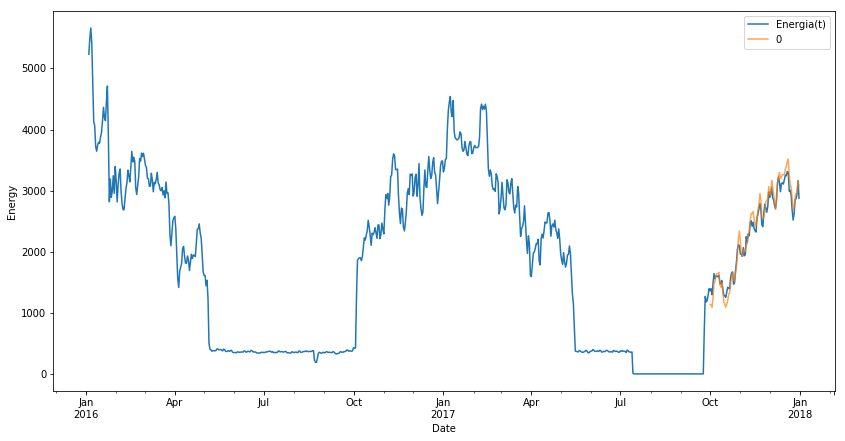

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

ax = df['Energia(t)'].plot(figsize=(14, 7))
y_pred_df.plot(ax=ax, label='Predykcja', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()

plt.savefig('wykres.jpg')
plt.show()